In [1]:
import matplotlib.pyplot as plt4
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [34]:
df = pd.read_csv("FF_Data_New.csv") 
df.head(n=5)

/var/folders/05/ntvwwb8x6tdf167m58_ryr800000gn/T/ipykernel_68594/1129564056.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FF_Data_New.csv")


,Unnamed: 0,time,Q_VFD1_Temperature,Q_VFD2_Temperature,Q_VFD3_Temperature,Q_VFD4_Temperature,M_Conv1_Speed_mmps,M_Conv2_Speed_mmps,M_Conv3_Speed_mmps,M_Conv4_Speed_mmps,...,Q_Cell_CycleCount,I_MHS_GreenRocketTray,Cam1,Cam2,_time,Description,CycleState,_time_new,Cycle_State_New,actual_state
0,0,2023-12-11 11:50:52.119915,73.130005,72.13002,73.13002,73.363525,111,83,111,111,...,1,True,Dataset/BATCH1000/000000_0.png,Dataset/BATCH1000/000000_1.png,2023-12-11 16:50:43.255,NoNose,2,2023-12-11 11:50:52.155,1,Normal
1,1,2023-12-11 11:50:52.483993,73.130005,72.13002,73.13002,73.363525,111,83,111,111,...,1,True,Dataset/BATCH1000/000001_0.png,Dataset/BATCH1000/000001_1.png,2023-12-11 16:50:43.539,NoNose,2,2023-12-11 11:50:52.439,1,Normal
2,2,2023-12-11 11:50:52.814902,73.130005,72.13002,73.13002,73.363525,111,83,111,111,...,1,True,Dataset/BATCH1000/000002_0.png,Dataset/BATCH1000/000002_1.png,2023-12-11 16:50:43.878,NoNose,2,2023-12-11 11:50:52.778,1,Normal
3,3,2023-12-11 11:50:53.210953,73.130005,72.13002,73.13002,73.352539,111,83,111,111,...,1,True,Dataset/BATCH1000/000003_0.png,Dataset/BATCH1000/000003_1.png,2023-12-11 16:50:44.354,NoNose,2,2023-12-11 11:50:53.254,1,Normal
4,4,2023-12-11 11:50:53.554022,73.130005,72.13002,73.13002,73.352539,111,83,111,111,...,1,True,Dataset/BATCH1000/000004_0.png,Dataset/BATCH1000/000004_1.png,2023-12-11 16:50:44.656,NoNose,2,2023-12-11 11:50:53.556,1,Normal


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166001 entries, 0 to 166000
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                166001 non-null  int64  
 1   time                      166001 non-null  object 
 2   Q_VFD1_Temperature        166001 non-null  float64
 3   Q_VFD2_Temperature        166001 non-null  float64
 4   Q_VFD3_Temperature        166001 non-null  float64
 5   Q_VFD4_Temperature        166001 non-null  float64
 6   M_Conv1_Speed_mmps        166001 non-null  int64  
 7   M_Conv2_Speed_mmps        166001 non-null  int64  
 8   M_Conv3_Speed_mmps        166001 non-null  int64  
 9   M_Conv4_Speed_mmps        166001 non-null  int64  
 10  I_R01_Gripper_Pot         166001 non-null  int64  
 11  I_R01_Gripper_Load        166001 non-null  int64  
 12  I_R02_Gripper_Pot         166001 non-null  int64  
 13  I_R02_Gripper_Load        166001 non-null  i

In [36]:
df['newds'] = df['actual_state'].fillna(0).replace({
    'Normal': 0, 'NoNose': 1, 'NoBody1': 1, 'NoBody2': 1,
    'NoNose,NoBody2': 1, 'NoBody2,NoBody1': 1, 'NoNose,NoBody2,NoBody1': 1
})
df

,Unnamed: 0,time,Q_VFD1_Temperature,Q_VFD2_Temperature,Q_VFD3_Temperature,Q_VFD4_Temperature,M_Conv1_Speed_mmps,M_Conv2_Speed_mmps,M_Conv3_Speed_mmps,M_Conv4_Speed_mmps,...,I_MHS_GreenRocketTray,Cam1,Cam2,_time,Description,CycleState,_time_new,Cycle_State_New,actual_state,newds
0,0,2023-12-11 11:50:52.119915,73.130005,72.130020,73.130020,73.363525,111,83,111,111,...,True,Dataset/BATCH1000/000000_0.png,Dataset/BATCH1000/000000_1.png,2023-12-11 16:50:43.255,NoNose,2,2023-12-11 11:50:52.155,1,Normal,0
1,1,2023-12-11 11:50:52.483993,73.130005,72.130020,73.130020,73.363525,111,83,111,111,...,True,Dataset/BATCH1000/000001_0.png,Dataset/BATCH1000/000001_1.png,2023-12-11 16:50:43.539,NoNose,2,2023-12-11 11:50:52.439,1,Normal,0
2,2,2023-12-11 11:50:52.814902,73.130005,72.130020,73.130020,73.363525,111,83,111,111,...,True,Dataset/BATCH1000/000002_0.png,Dataset/BATCH1000/000002_1.png,2023-12-11 16:50:43.878,NoNose,2,2023-12-11 11:50:52.778,1,Normal,0
3,3,2023-12-11 11:50:53.210953,73.130005,72.130020,73.130020,73.352539,111,83,111,111,...,True,Dataset/BATCH1000/000003_0.png,Dataset/BATCH1000/000003_1.png,2023-12-11 16:50:44.354,NoNose,2,2023-12-11 11:50:53.254,1,Normal,0
4,4,2023-12-11 11:50:53.554022,73.130005,72.130020,73.130020,73.352539,111,83,111,111,...,True,Dataset/BATCH1000/000004_0.png,Dataset/BATCH1000/000004_1.png,2023-12-11 16:50:44.656,NoNose,2,2023-12-11 11:50:53.556,1,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165996,165996,2023-12-12 11:25:40.344616,88.130219,86.130241,87.630241,87.986328,111,111,111,111,...,True,Dataset/BATCH166000/165996_0.png,Dataset/BATCH166000/165996_1.png,2023-12-12 16:25:31.442,NoNose,8,2023-12-12 11:25:40.342,285,NoNose,1
165997,165997,2023-12-12 11:25:40.828360,88.130219,86.130241,87.630241,87.975342,111,111,111,111,...,True,Dataset/BATCH166000/165997_0.png,Dataset/BATCH166000/165997_1.png,2023-12-12 16:25:31.961,NoNose,8,2023-12-12 11:25:40.861,285,NoNose,1
165998,165998,2023-12-12 11:25:41.347278,88.130219,86.130241,87.630241,87.964355,111,111,111,111,...,True,Dataset/BATCH166000/165998_0.png,Dataset/BATCH166000/165998_1.png,2023-12-12 16:25:32.457,NoNose,8,2023-12-12 11:25:41.357,285,NoNose,1
165999,165999,2023-12-12 11:25:41.871513,88.130219,86.130241,87.630241,87.953369,111,111,111,111,...,True,Dataset/BATCH166000/165999_0.png,Dataset/BATCH166000/165999_1.png,2023-12-12 16:25:32.953,NoNose,8,2023-12-12 11:25:41.853,285,NoNose,1


In [37]:
# random forest to check feature importance 
df=df.fillna(0) 
y = df.newds
X = df.drop(['newds','_time_new','CycleState','Cycle_State_New','Description','_time','Cam1','Cam2','Unnamed: 0','time'], axis=1)


In [38]:
X = X.drop(['Q_Cell_CycleCount','actual_state'], axis=1)


In [39]:
X

,Q_VFD1_Temperature,Q_VFD2_Temperature,Q_VFD3_Temperature,Q_VFD4_Temperature,M_Conv1_Speed_mmps,M_Conv2_Speed_mmps,M_Conv3_Speed_mmps,M_Conv4_Speed_mmps,I_R01_Gripper_Pot,I_R01_Gripper_Load,...,M_R03_TJointAngle_Degree,M_R04_SJointAngle_Degree,M_R04_LJointAngle_Degree,M_R04_UJointAngle_Degree,M_R04_RJointAngle_Degree,M_R04_BJointAngle_Degree,M_R04_TJointAngle_Degree,I_SafetyDoor1_Status,I_SafetyDoor2_Status,I_MHS_GreenRocketTray
0,73.130005,72.130020,73.130020,73.363525,111,83,111,111,5269,462,...,0.002151,-89.999023,0.016480,0.010986,-0.001172,-0.004120,0.004302,True,True,True
1,73.130005,72.130020,73.130020,73.363525,111,83,111,111,5277,436,...,0.002151,-89.999023,0.016480,0.010986,-0.001172,-0.004120,0.004302,True,True,True
2,73.130005,72.130020,73.130020,73.363525,111,83,111,111,4914,422,...,0.002151,-89.999023,0.016480,0.010986,-0.001172,-0.004120,0.004302,True,True,True
3,73.130005,72.130020,73.130020,73.352539,111,83,111,111,5235,484,...,0.002151,-89.999023,0.016480,0.010986,-0.001172,-0.004120,0.004302,True,True,True
4,73.130005,72.130020,73.130020,73.352539,111,83,111,111,5311,499,...,0.002151,-89.999023,0.016480,0.010986,-0.001172,-0.004120,0.004302,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165996,88.130219,86.130241,87.630241,87.986328,111,111,111,111,11198,398,...,-14.339691,-90.000000,0.781131,0.786621,0.000000,-0.005493,0.000000,True,True,True
165997,88.130219,86.130241,87.630241,87.975342,111,111,111,111,11189,420,...,-6.429843,-90.000000,0.781131,0.786621,0.000000,-0.005493,0.000000,True,True,True
165998,88.130219,86.130241,87.630241,87.964355,111,111,111,111,11249,460,...,42.066105,-90.000000,0.781131,0.786621,0.000000,-0.005493,0.000000,True,True,True
165999,88.130219,86.130241,87.630241,87.953369,111,111,111,111,11215,420,...,60.428482,-90.000000,0.781131,0.786621,0.000000,-0.005493,0.000000,True,True,True


In [40]:
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

In [41]:
feature_names=X.columns.tolist()
feature_names

['Q_VFD1_Temperature',
 'Q_VFD2_Temperature',
 'Q_VFD3_Temperature',
 'Q_VFD4_Temperature',
 'M_Conv1_Speed_mmps',
 'M_Conv2_Speed_mmps',
 'M_Conv3_Speed_mmps',
 'M_Conv4_Speed_mmps',
 'I_R01_Gripper_Pot',
 'I_R01_Gripper_Load',
 'I_R02_Gripper_Pot',
 'I_R02_Gripper_Load',
 'I_R03_Gripper_Pot',
 'I_R03_Gripper_Load',
 'I_R04_Gripper_Pot',
 'I_R04_Gripper_Load',
 'M_R01_SJointAngle_Degree',
 'M_R01_LJointAngle_Degree',
 'M_R01_UJointAngle_Degree',
 'M_R01_RJointAngle_Degree',
 'M_R01_BJointAngle_Degree',
 'M_R01_TJointAngle_Degree',
 'M_R02_SJointAngle_Degree',
 'M_R02_LJointAngle_Degree',
 'M_R02_UJointAngle_Degree',
 'M_R02_RJointAngle_Degree',
 'M_R02_BJointAngle_Degree',
 'M_R02_TJointAngle_Degree',
 'M_R03_SJointAngle_Degree',
 'M_R03_LJointAngle_Degree',
 'M_R03_UJointAngle_Degree',
 'M_R03_RJointAngle_Degree',
 'M_R03_BJointAngle_Degree',
 'M_R03_TJointAngle_Degree',
 'M_R04_SJointAngle_Degree',
 'M_R04_LJointAngle_Degree',
 'M_R04_UJointAngle_Degree',
 'M_R04_RJointAngle_Degree'

Feature: 0, Score: 0.02466
Feature: 1, Score: 0.03393
Feature: 2, Score: 0.02095
Feature: 3, Score: 0.04041
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00985
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.08032
Feature: 9, Score: 0.16286
Feature: 10, Score: 0.08569
Feature: 11, Score: 0.02862
Feature: 12, Score: 0.03825
Feature: 13, Score: 0.03628
Feature: 14, Score: 0.04400
Feature: 15, Score: 0.19021
Feature: 16, Score: 0.01480
Feature: 17, Score: 0.01167
Feature: 18, Score: 0.00519
Feature: 19, Score: 0.01031
Feature: 20, Score: 0.00772
Feature: 21, Score: 0.00455
Feature: 22, Score: 0.00812
Feature: 23, Score: 0.00504
Feature: 24, Score: 0.00544
Feature: 25, Score: 0.00566
Feature: 26, Score: 0.00523
Feature: 27, Score: 0.00619
Feature: 28, Score: 0.00813
Feature: 29, Score: 0.00742
Feature: 30, Score: 0.00535
Feature: 31, Score: 0.00570
Feature: 32, Score: 0.00625
Feature: 33, Score: 0.00545
Feature: 34, Score: 0.01192
Feature: 35, Score: 0.01250
Fe

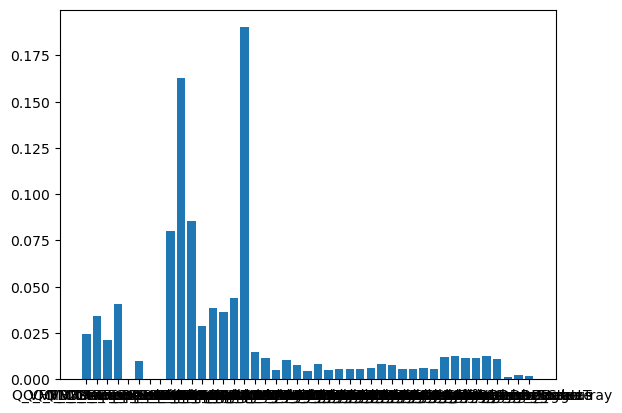

In [43]:
# summarize feature importance
feature_names=X.columns.tolist()

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar(feature_names, importance)

pyplot.savefig('feature_importance.png')
pyplot.show()


Feature: I_R04_Gripper_Load, Score: 0.18252
Feature: I_R01_Gripper_Load, Score: 0.17378
Feature: I_R02_Gripper_Pot, Score: 0.08497
Feature: I_R01_Gripper_Pot, Score: 0.07382
Feature: I_R04_Gripper_Pot, Score: 0.04398
Feature: Q_VFD4_Temperature, Score: 0.03966
Feature: I_R03_Gripper_Pot, Score: 0.03909
Feature: I_R03_Gripper_Load, Score: 0.03594
Feature: Q_VFD2_Temperature, Score: 0.03338
Feature: I_R02_Gripper_Load, Score: 0.02860


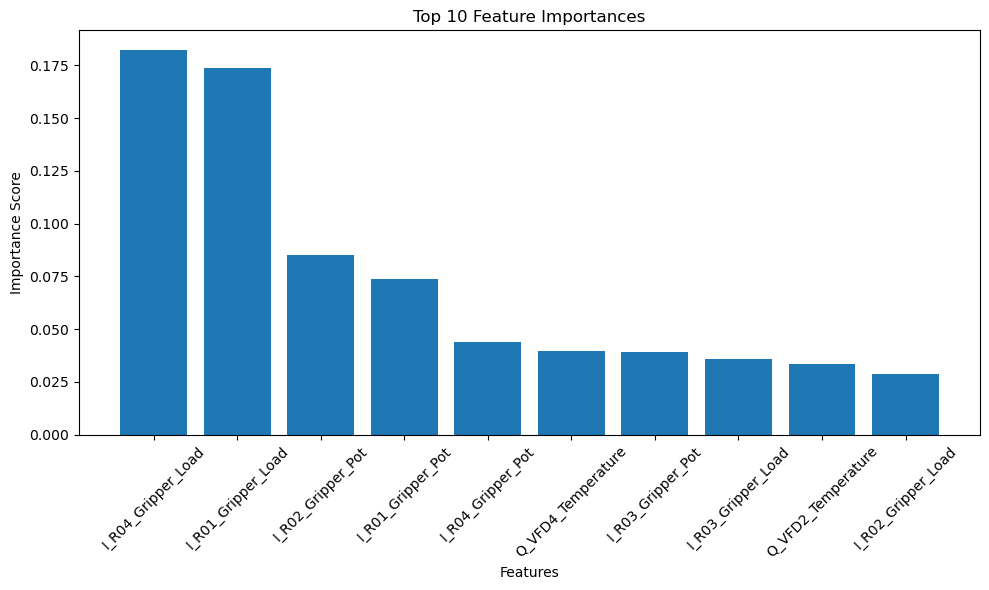

In [48]:
import matplotlib.pyplot as pyplot
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier()

# Fit the model
model.fit(X, y)

# Get feature importances
importance = model.feature_importances_

# Summarize feature importance
feature_names = X.columns.tolist()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sort by importance and get top 10
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

for i, row in top_10_features.iterrows():
    print(f"Feature: {row['Feature']}, Score: {row['Importance']:.5f}")

# Plot feature importance
pyplot.figure(figsize=(10, 6))
pyplot.bar(top_10_features['Feature'], top_10_features['Importance'])
pyplot.xlabel('Features')
pyplot.ylabel('Importance Score')
pyplot.title('Top 10 Feature Importances')
pyplot.xticks(rotation=45)
pyplot.tight_layout()

# Save plot as PNG file
pyplot.savefig('top_10_feature_importance.png')

# Show plot
pyplot.show()


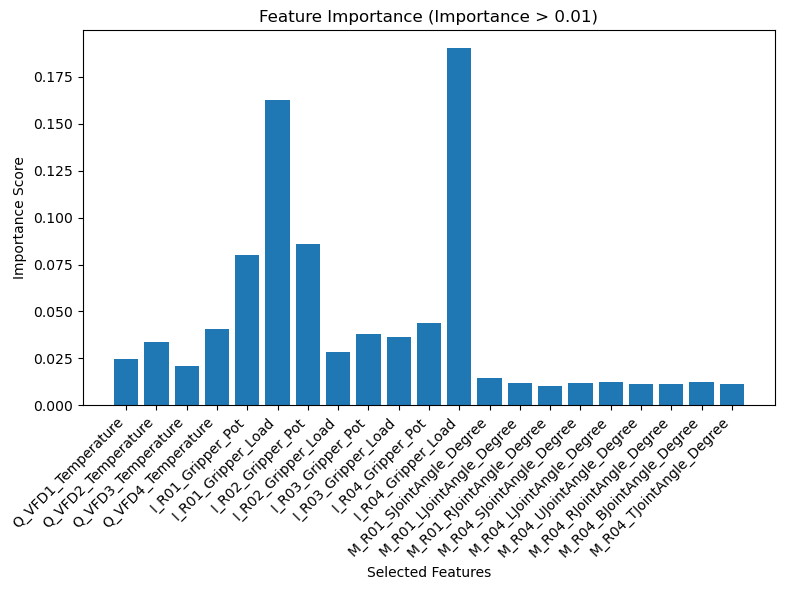

In [44]:
# Define a threshold for importance
threshold = 0.01

# Filter features based on importance
selected_features = [feature for feature, score in zip(feature_names, importance) if score > threshold]

# Filter importance scores for selected features
selected_importance = [score for score in importance if score > threshold]

# Plot selected features with importance scores
pyplot.figure(figsize=(8, 6))
pyplot.bar(selected_features, selected_importance)
pyplot.xlabel('Selected Features')
pyplot.ylabel('Importance Score')
pyplot.title('Feature Importance (Importance > 0.01)')
pyplot.xticks(rotation=45, ha='right')

# Save the plot
pyplot.savefig('selected_feature_importance.png')

# Show the plot
pyplot.tight_layout()
pyplot.show()

In [45]:
# Define a threshold for importance
threshold = 0.01

# Select features with importance greater than the threshold
selected_features = [feature for feature, score in zip(feature_names, importance) if score > threshold]

# Print the selected features
print("Selected Features with Importance > 0.01:")
for feature in selected_features:
    print(feature)

Selected Features with Importance > 0.01:
Q_VFD1_Temperature
Q_VFD2_Temperature
Q_VFD3_Temperature
Q_VFD4_Temperature
I_R01_Gripper_Pot
I_R01_Gripper_Load
I_R02_Gripper_Pot
I_R02_Gripper_Load
I_R03_Gripper_Pot
I_R03_Gripper_Load
I_R04_Gripper_Pot
I_R04_Gripper_Load
M_R01_SJointAngle_Degree
M_R01_LJointAngle_Degree
M_R01_RJointAngle_Degree
M_R04_SJointAngle_Degree
M_R04_LJointAngle_Degree
M_R04_UJointAngle_Degree
M_R04_RJointAngle_Degree
M_R04_BJointAngle_Degree
M_R04_TJointAngle_Degree


In [46]:
X

,Q_VFD1_Temperature,Q_VFD2_Temperature,Q_VFD3_Temperature,Q_VFD4_Temperature,M_Conv1_Speed_mmps,M_Conv2_Speed_mmps,M_Conv3_Speed_mmps,M_Conv4_Speed_mmps,I_R01_Gripper_Pot,I_R01_Gripper_Load,...,M_R03_TJointAngle_Degree,M_R04_SJointAngle_Degree,M_R04_LJointAngle_Degree,M_R04_UJointAngle_Degree,M_R04_RJointAngle_Degree,M_R04_BJointAngle_Degree,M_R04_TJointAngle_Degree,I_SafetyDoor1_Status,I_SafetyDoor2_Status,I_MHS_GreenRocketTray
0,73.130005,72.130020,73.130020,73.363525,111,83,111,111,5269,462,...,0.002151,-89.999023,0.016480,0.010986,-0.001172,-0.004120,0.004302,True,True,True
1,73.130005,72.130020,73.130020,73.363525,111,83,111,111,5277,436,...,0.002151,-89.999023,0.016480,0.010986,-0.001172,-0.004120,0.004302,True,True,True
2,73.130005,72.130020,73.130020,73.363525,111,83,111,111,4914,422,...,0.002151,-89.999023,0.016480,0.010986,-0.001172,-0.004120,0.004302,True,True,True
3,73.130005,72.130020,73.130020,73.352539,111,83,111,111,5235,484,...,0.002151,-89.999023,0.016480,0.010986,-0.001172,-0.004120,0.004302,True,True,True
4,73.130005,72.130020,73.130020,73.352539,111,83,111,111,5311,499,...,0.002151,-89.999023,0.016480,0.010986,-0.001172,-0.004120,0.004302,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165996,88.130219,86.130241,87.630241,87.986328,111,111,111,111,11198,398,...,-14.339691,-90.000000,0.781131,0.786621,0.000000,-0.005493,0.000000,True,True,True
165997,88.130219,86.130241,87.630241,87.975342,111,111,111,111,11189,420,...,-6.429843,-90.000000,0.781131,0.786621,0.000000,-0.005493,0.000000,True,True,True
165998,88.130219,86.130241,87.630241,87.964355,111,111,111,111,11249,460,...,42.066105,-90.000000,0.781131,0.786621,0.000000,-0.005493,0.000000,True,True,True
165999,88.130219,86.130241,87.630241,87.953369,111,111,111,111,11215,420,...,60.428482,-90.000000,0.781131,0.786621,0.000000,-0.005493,0.000000,True,True,True


<AxesSubplot:>

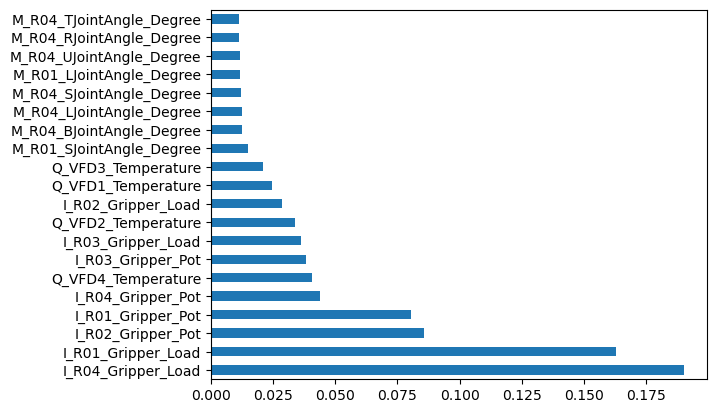

In [47]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(20)
   .plot(kind='barh'))   

Text(0, 0.5, 'x3')

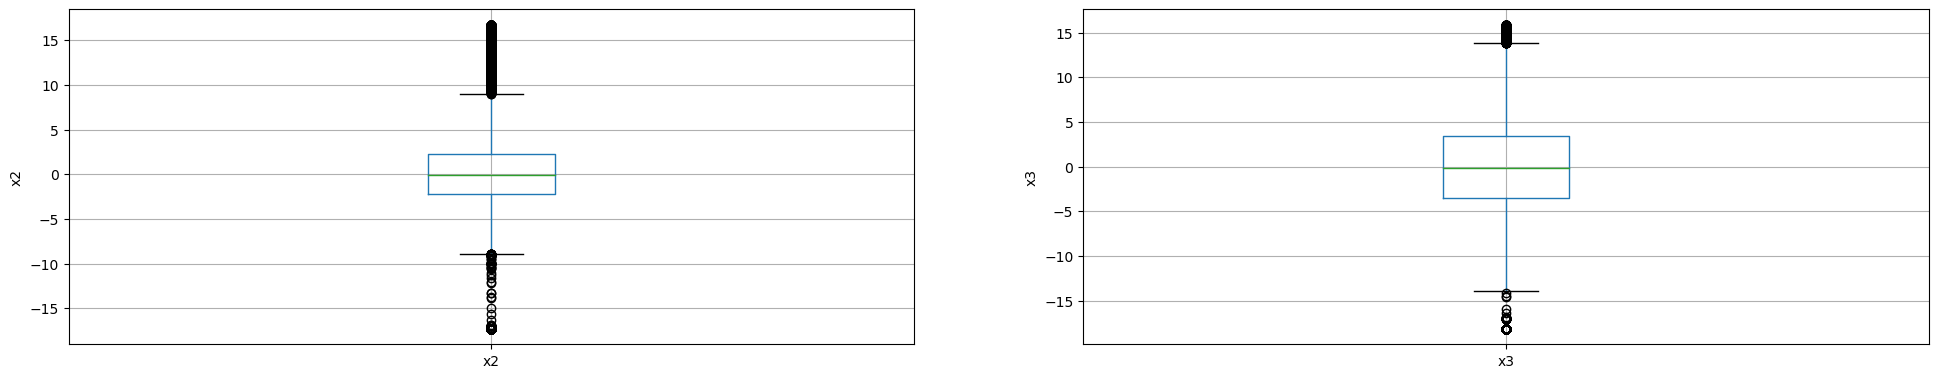

In [27]:
# draw boxplots to visualize outliers of max scored features
import matplotlib.pyplot as plt

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='x2')
fig.set_title('')
fig.set_ylabel('x2')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='x3')
fig.set_title('')
fig.set_ylabel('x3')



Text(0, 0.5, 'x3')

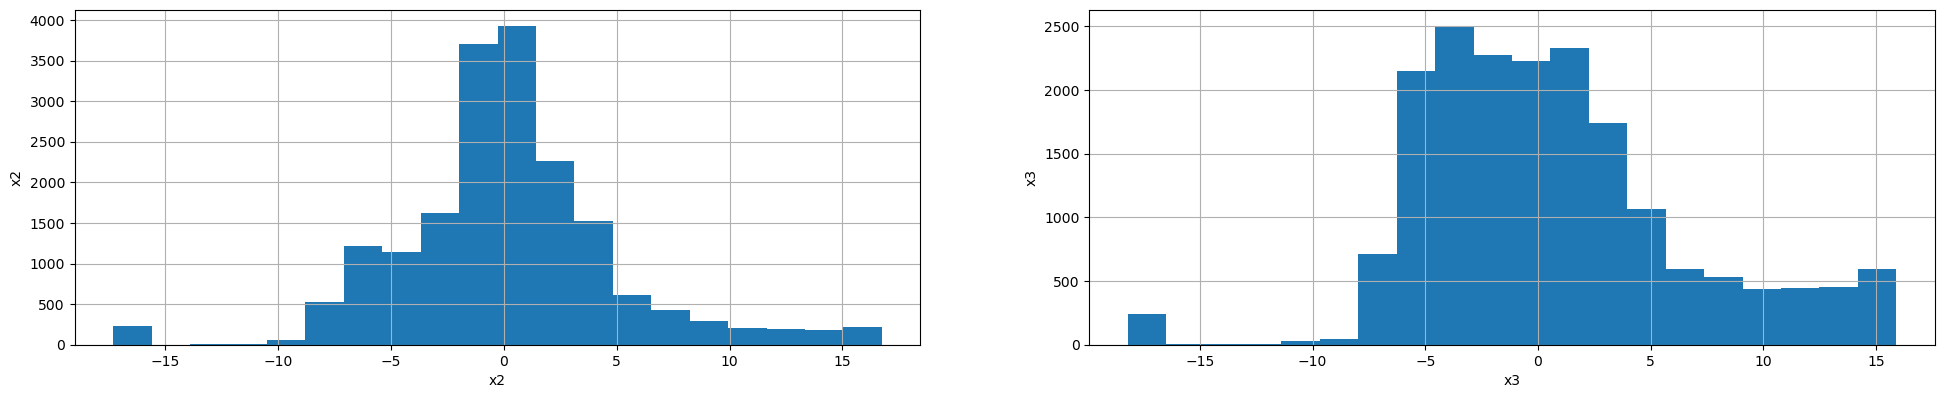

In [28]:
# plot histogram to check distribution of max scored features

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df['x2'].hist(bins=20)
fig.set_xlabel('x2')
fig.set_ylabel('x2')

plt.subplot(4, 2, 2)
fig = df['x3'].hist(bins=20)
fig.set_xlabel('x3')
fig.set_ylabel('x3')

In [8]:
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60
0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,-0.038189,...,29.984624,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076
1,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,-0.038189,...,29.984624,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083
2,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,-0.018352,...,29.984624,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090
3,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,-0.008280,...,29.984624,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097
4,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,-0.008280,...,29.984624,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,-0.080108,-0.038189,...,29.984624,-0.773514,-0.752385,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242
18394,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,-0.080108,-0.038189,...,29.984624,-0.773514,-0.752385,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235
18395,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,-0.080108,-0.038189,...,29.984624,-0.773514,-0.752385,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228
18396,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,-0.080108,-0.038189,...,29.984624,-0.773514,-0.752385,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221


In [9]:
y

0        0
1        0
2        0
3        0
4        0
        ..
18393    0
18394    0
18395    0
18396    0
18397    0
Name: y, Length: 18398, dtype: int64

In [ ]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# load dataset

# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=100, random_state=1), n_features_to_select=15)
fit = rfe.fit(X, y)


In [ ]:
# report selected features
print('Selected Features:')


In [ ]:
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()